# Capstone Project: Predicting NHL Player Salary

## Part II - Exploratory Data Analysis (EDA)

Author: Charles Ramey

Date: 05/15/2023

---

#### Notebook Links

Part I - Project Intro & Data Cleaning
- [`Part-1_setup-and-cleaning.ipynb`](../code/Part-1_setup-and-cleaning.ipynb)

Part III - Modeling
- [`Part-3.1_modeling-forwards.ipynb`](../code/Part-3.1_modeling-forwards.ipynb)
- [`Part-3.2_modeling-defense.ipynb`](../code/Part-3.2_modeling-defense.ipynb)
- [`Part-3.3_modeling-goalies.ipynb`](../code/Part-3.3_modeling-goalies.ipynb)

Part IV - Conclusion, Recommendations, and Sources
- [`Part-4_conclusion-and-recommendations.ipynb`](../code/Part-4_conclusion-and-recommendations.ipynb)

### Contents

- [Data Import and Additional Cleaning](#Data-Import-and-Additional-Cleaning)
- [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))

## Data Import and Additional Cleaning

### Library Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### Data Import

In [2]:
signings = pd.read_csv('../data/signings_cleaned.csv')

In [3]:
skaters = pd.read_csv('../data/skaters_cleaned.csv')

In [4]:
forwards = pd.read_csv('../data/forwards_cleaned.csv')

In [5]:
defense = pd.read_csv('../data/defense_cleaned.csv')

In [6]:
goalies = pd.read_csv('../data/goalies_cleaned.csv')


### More Cleaning

## Exploratory Data Analysis (EDA)


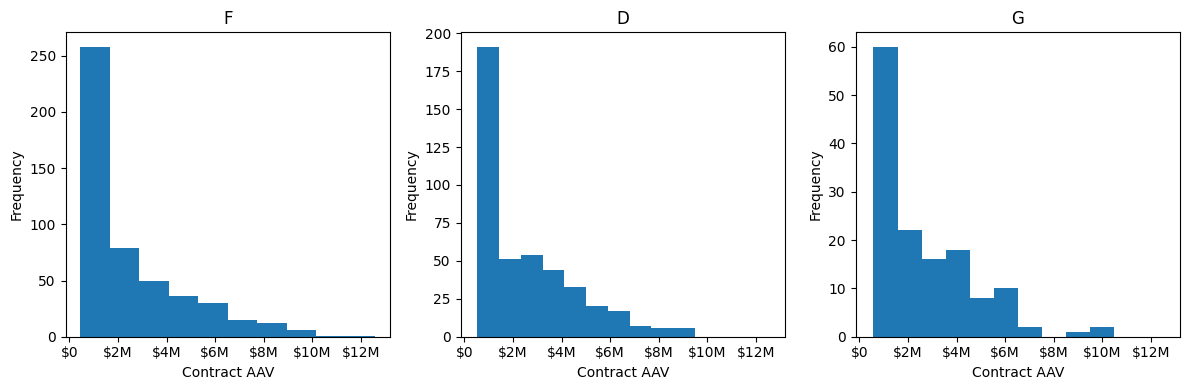

In [7]:
# List of position dataframes
position_dfs = [forwards, defense, goalies]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True)

# Iterate over each position dataframe and create a histogram subplot
for i, position_df in enumerate(position_dfs):
    # Select the corresponding subplot
    ax = axes[i]

    # Plot histogram of contract_aav for the position
    ax.hist(position_df['contract_aav'], bins=10)  # Adjust the number of bins as needed

    # Set subplot title and labels
    ax.set_title(position_df['pos'].iloc[0])
    ax.set_xlabel('Contract AAV')
    ax.set_ylabel('Frequency')
    ax.set_xticks([0, 2000000, 4000000, 6000000, 8000000, 10000000, 12000000])
    ax.set_xticklabels(['$0', '$2M', '$4M', '$6M', '$8M', '$10M', '$12M'])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show();




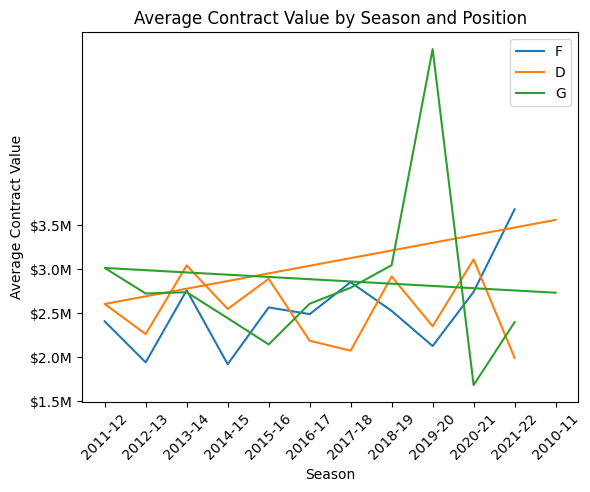

In [8]:
"""
Plot average contract value by position over total time frame
"""

# List of position dataframes
position_dfs = [forwards, defense, goalies]

# Create a line plot for each position dataframe
for position_df in position_dfs:
    # Group the data by season and calculate the average contract_aav
    grouped_df = position_df.groupby('season')['contract_aav'].mean().reset_index()

    # Plot the line for the position
    plt.plot(grouped_df['season'], grouped_df['contract_aav'], label=position_df['pos'].iloc[0])
    
# Set the plot title and labels
plt.title('Average Contract Value by Season and Position')
plt.xlabel('Season')
plt.ylabel('Average Contract Value')
plt.xticks(rotation=45)
plt.yticks([1500000, 2000000, 2500000, 3000000, 3500000], 
           ['$1.5M', '$2.0M', '$2.5M', '$3.0M', '$3.5M'])
plt.legend()

plt.show();

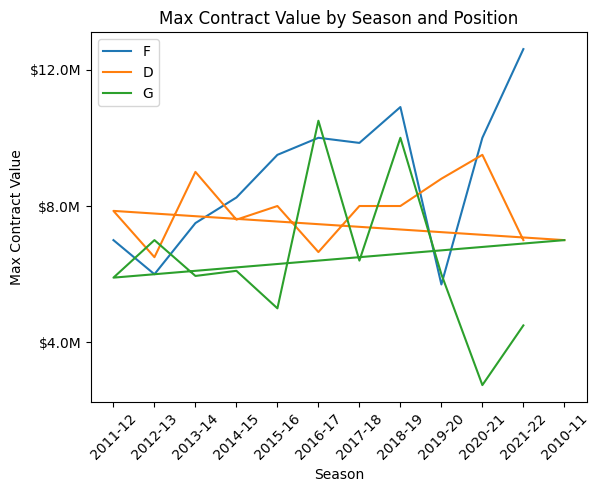

In [9]:
# List of position dataframes
position_dfs = [forwards, defense, goalies]

# Create a line plot for each position dataframe
for position_df in position_dfs:
    # Group the data by season and calculate the average contract_aav
    grouped_df = position_df.groupby('season')['contract_aav'].max().reset_index()

    # Plot the line for the position
    plt.plot(grouped_df['season'], grouped_df['contract_aav'], label=position_df['pos'].iloc[0])
    
# Set the plot title and labels
plt.title('Max Contract Value by Season and Position')
plt.xlabel('Season')
plt.ylabel('Max Contract Value')
plt.xticks(rotation=45)
plt.yticks([4000000, 8000000, 12000000], 
           ['$4.0M', '$8.0M', '$12.0M'])
plt.legend()

plt.show();

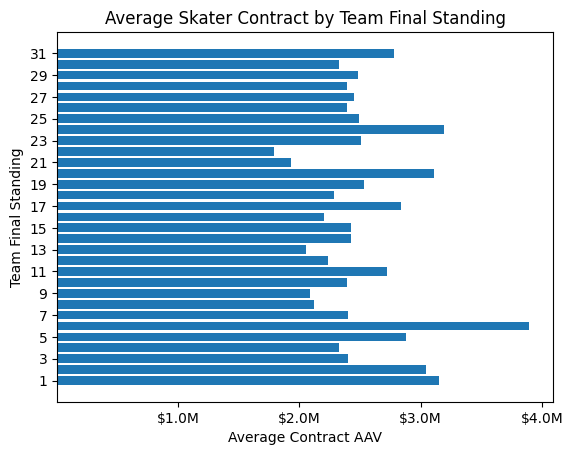

In [10]:
# Group the data by team_final standing and calculate the average contract_aav
grouped_df = skaters.groupby('final_standing')['contract_aav'].mean().reset_index()

# Sort the dataframe by final_standing in descending order
grouped_df.sort_values('final_standing', ascending=False, inplace=True)

# Create the horizontal bar plot
plt.barh(grouped_df['final_standing'], grouped_df['contract_aav'])

# Set the plot title and labels
plt.title('Average Skater Contract by Team Final Standing')
plt.xlabel('Average Contract AAV')
plt.ylabel('Team Final Standing')
plt.xticks([1000000, 2000000, 3000000, 4000000], 
           ['$1.0M', '$2.0M', '$3.0M', '$4.0M'])
plt.yticks(range(1, 32, 2))

# Display the plot
plt.show();

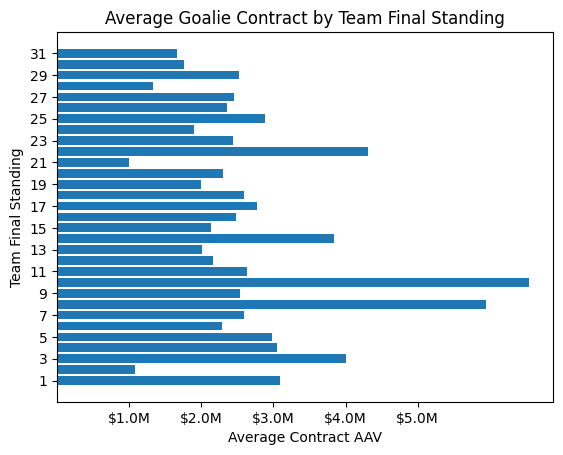

In [11]:
# Group the data by team_final standing and calculate the average contract_aav
grouped_df = goalies.groupby('final_standing')['contract_aav'].mean().reset_index()

# Sort the dataframe by final_standing in descending order
grouped_df.sort_values('final_standing', ascending=False, inplace=True)

# Create the horizontal bar plot
plt.barh(grouped_df['final_standing'], grouped_df['contract_aav'])

# Set the plot title and labels
plt.title('Average Goalie Contract by Team Final Standing')
plt.xlabel('Average Contract AAV')
plt.ylabel('Team Final Standing')
plt.xticks([1000000, 2000000, 3000000, 4000000, 5000000], 
           ['$1.0M', '$2.0M', '$3.0M', '$4.0M', '$5.0M'])
plt.yticks(range(1, 32, 2))

# Display the plot
plt.show();

In [12]:
"""
Create a dataframe showing the highest contract_aav at each position in the 2021-22 season
"""

signings[signings['season'] == '2021-22'].groupby('pos').max()

,player,age,extension,contract_aav,season
pos,,,,,
D,Victor Mete,35,1,7000000,2021-22
F,Tyler Motte,32,1,12600000,2021-22
G,Spencer Knight,41,1,4500000,2021-22


In [13]:
new_df = signings.pivot_table(index='pos', columns='season', values='contract_aav', aggfunc='max')
new_df

season,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22
pos,,,,,,,,,,,,
D,7000000.0,7857142.0,6500000.0,9000000.0,7600000.0,8000000.0,7000000.0,8000000.0,8000000.0,8800000.0,9583333.0,7000000.0
F,NaN,7000000.0,6000000.0,7500000.0,8250000.0,9500000.0,10000000.0,9850000.0,10901333.0,5700000.0,10000000.0,12600000.0
G,7000000.0,5900000.0,7000000.0,5950000.0,6100000.0,5000000.0,10500000.0,6400000.0,10000000.0,6000000.0,2750000.0,4500000.0


---
#### Notebook Links

Part I - Project Intro & Data Cleaning
- [`Part-1_setup-and-cleaning.ipynb`](../code/Part-1_setup-and-cleaning.ipynb)

Part III - Modeling
- [`Part-3_modeling.ipynb`](../code/Part-3_modeling.ipynb)

Part IV - Conclusion, Recommendations, and Sources
- [`Part-4_conclusion-and-recommendations.ipynb`](../code/Part-4_conclusion-and-recommendations.ipynb)